## 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
# !pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [2]:
# !pip install --upgrade pip
# !pip install tensorflow

# 2. collect text images

In [3]:
import os
import time
import uuid
import cv2

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# IMAGES_PATH = os.path.join('data','images')
# number_images = 30

In [6]:
# from google.colab.patches import cv2_imshow

In [7]:
# cap = cv2.VideoCapture(0)
# for imgnum in range(2):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

colab camera

In [8]:
# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# from base64 import b64decode

# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#     async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const capture = document.createElement('button');
#       capture.textContent = 'Capture';
#       div.appendChild(capture);

#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       // Wait for Capture to be clicked.
#       await new Promise((resolve) => capture.onclick = resolve);

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)
#   data = eval_js('takePhoto({})'.format(quality))
#   binary = b64decode(data.split(',')[1])
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return filename

In [9]:
# from IPython.display import Image
# try:
#   filename = take_photo()
#   print('Saved to {}'.format(filename))
  
#   # Show the image which was just taken.
#   display(Image(filename))
# except Exception as err:
#   # Errors will be thrown if the user does not have a webcam or if they do not
#   # grant the page permission to access it.
#   print(str(err))

In [10]:
# from google.colab.patches import cv2_imshow

In [11]:
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
# import cv2
# img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)

In [12]:
# cv2_imshow(frame)

end of colab image capture

In [13]:
# # cap = cv2.VideoCapture(2)
# # img = cv2.imread('img.jpg')
# # cv2.imshow('frame', img)
# for imgnum in range(number_images):
#     print('Collecting image {}'.format(imgnum))
    
#     frame = take_photo()
#     imgname = os.path.join(IMAGES_PATH,'/content/drive/MyDrive/Colab Notebooks/face detection/data/images')
#     cv2.imwrite(imgname, frame)
#     cv2_imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# take_photo().release()
# cv2.destroyAllWindows()

In [14]:
# cv2.namedWindow(winname='my')
# while True:
#      cv2.imshow('my',img)
#      if cv2.waitKey(1) & 0xFF == 27:
#          break
# cv2.destroyAllWindows()


## 1.3 Annotate Images with LabelMe

In [15]:
# !pip install labelme  

In [153]:
!labelme 

C:\Users\adabd\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:850: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


# 2. Review Dataset and Build Image Loading Function

In [17]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [18]:
tf.config.list_physical_devices('GPU')

[]

In [19]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)

>> uncomment 

In [20]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

# 2.3 Load Image into TF Data Pipeline

In [21]:
# images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [22]:
# images.as_numpy_iterator().next()

In [23]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [24]:
# images = images.map(load_image)

NameError: name 'images' is not defined

In [ ]:
# images.as_numpy_iterator().next()

In [25]:
# type(images)

## 2.4 View Raw Images with Matplotlib

In [26]:
# image_generator = images.batch(4).as_numpy_iterator()

NameError: name 'images' is not defined

In [ ]:
# plot_images = image_generator.next()

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, image in enumerate(plot_images):
#     ax[idx].imshow(image) 
# plt.show()

In [ ]:
# 3. Partition Unaugmented Data

## 3. Partition Unaugmented Data

In [ ]:
264*.7 #185 to train

In [ ]:
264*.15 # 33 to test and 21 to val

## 3.2 Move the Matching Labels

In [ ]:
# # match the labels
# for folder in ['test','train']:
#     for file in os.listdir(os.path.join('data', folder, 'images')):
        
#         filename = file.split('.')
        
#         if len(filename) > 2:
#             newFilename = filename[0]+filename[1]+'.jpg'
#             # print(newFilename)
#             # print(IMG_20190715_121810labeled.jpg)
#             os.renames('data/'+folder+'/images/'+file,'data/'+folder+'/images/'+newFilename)
# for folder in ['test','train','val']:
#     for file in os.listdir(os.path.join('data','labels')):
        
#         filename = file.split('.')
        
#         if len(filename) > 2:
#             newFilename = filename[0]+filename[1]+'.json'
#             # print(newFilename)
#             # print(IMG_20190715_121810labeled.jpg)
#             os.renames('data/labels/'+file,'data/labels/'+newFilename)
            
      

In [ ]:
# for folder in ['train','test','val']:
#     for file in os.listdir(os.path.join('data', folder, 'images')):
        
#         filename = file.split('.')[0]+'.json'
#         existing_filepath = os.path.join('data','labels', filename)
#         if os.path.exists(existing_filepath): 
#             new_filepath = os.path.join('data',folder,'labels',filename)
#             os.replace(existing_filepath, new_filepath)    

In [ ]:
# for folder in ['/content/drive/MyDrive/Colab Notebooks/face detection/data/train',
#                '/content/drive/MyDrive/Colab Notebooks/face detection/data/test',
#                '/content/drive/MyDrive/Colab Notebooks/face detection/data/val']:
#     for file in os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/data', folder, 
#                                         'images')):
        
#         filename = file.split('.')[0]+'.json'
#         existing_filepath = os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/data',
#                                          'labels', filename)
#         if os.path.exists(existing_filepath): 
#             new_filepath = os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/data',folder,
#                                         'labels',filename)
#             os.replace(existing_filepath, new_filepath)   

## 4. Apply Image Augmentation on Images and Labels using Albumentations

In [27]:
# setting up pipeline
!pip install albumentations

In [28]:
import albumentations as alb

In [29]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))


## 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [154]:
img = cv2.imread(os.path.join('data', 'train', 'images', '01croplabeled.jpg'))

In [155]:
with open(os.path.join('data', 'train', 'labels', '01croplabeled.json'), 'r') as f:
    label = json.load(f)
# with open(os.path.join('data\val\labels\IMG_20190715_121751labeled.json'), 'r') as f:
    # label = json.load(f)

In [150]:
with open(os.path.join('data', 'train', 'labels', '07labeled.json'), 'r') as f:
    labeld = json.load(f)

In [152]:
labeld['shapes'][0]['points'][0][0]

In [156]:
label['shapes'][0]['points']

[[59.690721649484516, 87.42268041237114],
 [417.42268041237116, 416.2886597938144]]

In [149]:
# for partition in ['train','test','val']: 
#     for label in os.listdir(os.path.join('data', partition, 'labels')):
#         with open(os.path.join('data', partition, 'labels',label), 'r') as f:
#             labelr = json.load(f)
#             print(labelr['shapes'][0]['points'])
#             first = labelr['shapes'][0]['points'][0][0]
            
#             last = labelr['shapes'][0]['points'][1][0]
#             print(first,last, 'checking')
#             if first > last:
#                 print('hey')
#             break
    # for image in os.listdir(os.path.join('data', partition, 'labels')):


[[143.1843575418994, 211.50837988826817], [458.268156424581, 284.6927374301676]]
143.1843575418994 458.268156424581 checking
[[143.0, 138.0], [399.0, 311.0]]
143.0 399.0 checking
[[39.27374301675975, 55.64245810055867], [577.8212290502793, 437.76536312849163]]
39.27374301675975 577.8212290502793 checking


In [157]:
img.shape

(480, 640, 3)

In [158]:
# img
# label

## 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [159]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [160]:
coords

[59.690721649484516, 87.42268041237114, 417.42268041237116, 416.2886597938144]

In [161]:
coords = list(np.divide(coords, [640,480,640,480]))

In [162]:
coords

[0.09326675257731956,
 0.18213058419243985,
 0.65222293814433,
 0.8672680412371133]

In [163]:

# 4.4 Apply Augmentations and View Results

## 4.4 Apply Augmentations and View Results

In [164]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['braille'])

In [165]:
# augmented['bboxes'][0][2:]

In [166]:
# augmented['image']

In [167]:
# augmented['bboxes']

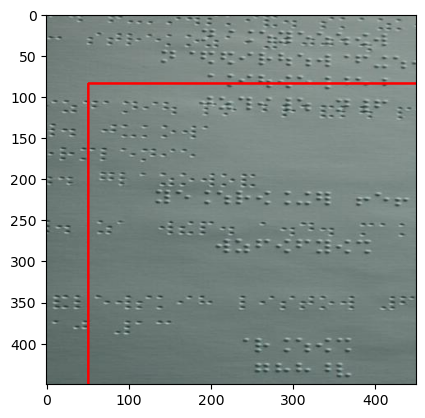

In [168]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [650,650]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [650,650]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

## 5. Build and Run Augmentation Pipeline

## 5.1 Run Augmentation Pipeline

In [72]:
# for partition in ['/content/drive/MyDrive/Colab Notebooks/face detection/data/train','/content/drive/MyDrive/Colab Notebooks/face detection/data/test','/content/drive/MyDrive/Colab Notebooks/face detection/data/val']: 
#     for image in os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/data', partition, 'images')):
#         img = cv2.imread(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/data', partition, 'images', image))

#         coords = [0,0,0.00001,0.00001]
#         label_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/data', partition, 'labels', f'{image.split(".")[0]}.json')
#         if os.path.exists(label_path):
#             with open(label_path, 'r') as f:
#                 label = json.load(f)

#             coords[0] = label['shapes'][0]['points'][0][0]
#             coords[1] = label['shapes'][0]['points'][0][1]
#             coords[2] = label['shapes'][0]['points'][1][0]
#             coords[3] = label['shapes'][0]['points'][1][1]
#             coords = list(np.divide(coords, [640,480,640,480]))

#         try: 
#             for x in range(60):
#                 augmented = augmentor(image=img, bboxes=[coords], class_labels=['braille'])
#                 cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/aug_data',
#                                          partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

#                 annotation = {}
#                 annotation['image'] = image

#                 if os.path.exists(label_path):
#                     if len(augmented['bboxes']) == 0: 
#                         annotation['bbox'] = [0,0,0,0]
#                         annotation['class'] = 0 
#                     else: 
#                         annotation['bbox'] = augmented['bboxes'][0]
#                         annotation['class'] = 1
#                 else: 
#                     annotation['bbox'] = [0,0,0,0]
#                     annotation['class'] = 0 


#                 with open(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
#                     json.dump(annotation, f)

#         except Exception as e:
#             print(e)


In [73]:
# for partition in ['train','test','val']: 
#     for image in os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/data', partition, 'images')):
#         img = cv2.imread(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/data', partition, 'images', image))

#         coords = [0,0,0.00001,0.00001]
#         label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
#         if os.path.exists(label_path):
        #     with open(label_path, 'r') as f:
        #         label = json.load(f)

        #     coords[0] = label['shapes'][0]['points'][0][0]
        #     coords[1] = label['shapes'][0]['points'][0][1]
        #     coords[2] = label['shapes'][0]['points'][1][0]
        #     coords[3] = label['shapes'][0]['points'][1][1]
        #     coords = list(np.divide(coords, [640,480,640,480]))

        # try: 
        #     for x in range(60):
        #         augmented = augmentor(image=img, bboxes=[coords], class_labels=['braille'])
        #         cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

        #         annotation = {}
        #         annotation['image'] = image

        #         if os.path.exists(label_path):
        #             if len(augmented['bboxes']) == 0: 
        #                 annotation['bbox'] = [0,0,0,0]
        #                 annotation['class'] = 0 
        #             else: 
        #                 annotation['bbox'] = augmented['bboxes'][0]
        #                 annotation['class'] = 1
        #         else: 
        #             annotation['bbox'] = [0,0,0,0]
        #             annotation['class'] = 0 


        #         with open(os.path.join('/content/drive/MyDrive/Colab Notebooks/face detection/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
        #             json.dump(annotation, f)

        # except Exception as e:
        #     print(e)

In [171]:
for partition in ['test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(33):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['braille'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)
            print(image)

Requested crop size (450, 450) is larger than the image size (357, 480)
IMG_20190715_122812labeled.jpg
Requested crop size (450, 450) is larger than the image size (357, 480)
IMG_20190715_122826labeled.jpg


# load aug

In [172]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [369]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [174]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [175]:
train_images.as_numpy_iterator().next()

array([[[0.98039216, 0.9764706 , 0.99607843],
        [0.98039216, 0.9764706 , 0.99607843],
        [0.98039216, 0.9764706 , 0.99607843],
        ...,
        [0.98039216, 0.9764706 , 1.        ],
        [0.98039216, 0.9764706 , 1.        ],
        [0.98039216, 0.9764706 , 0.997549  ]],

       [[0.98039216, 0.9764706 , 1.        ],
        [0.98039216, 0.9764706 , 1.        ],
        [0.98039216, 0.9764706 , 1.        ],
        ...,
        [0.98039216, 0.9764706 , 1.        ],
        [0.98039216, 0.9764706 , 1.        ],
        [0.98039216, 0.9764706 , 1.        ]],

       [[0.98020834, 0.97628677, 0.9958946 ],
        [0.9803309 , 0.9764093 , 0.99601716],
        [0.97990197, 0.9759804 , 0.99558824],
        ...,
        [0.97990197, 0.9759804 , 0.99558824],
        [0.98039216, 0.9764706 , 0.99607843],
        [0.97879905, 0.9748775 , 0.9944853 ]],

       ...,

       [[0.9664828 , 0.9511029 , 0.8050245 ],
        [0.7739583 , 0.7550245 , 0.66746324],
        [0.8340074 , 0

# prepare labels

## 6.1 Build Label Loading Function

In [176]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [177]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [368]:

test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [179]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [180]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

## Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [181]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(6039, 6039, 1287, 1287, 1287, 1287)

## 7.2 Create Final Datasets (Images/Labels)

In [183]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(6500)
train = train.batch(8)
train = train.prefetch(4)

In [184]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(2000)
val = val.batch(8)
val = val.prefetch(4)

In [370]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(2000)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:

# test_images = tf.data.Dataset.list_files('data\\zz bck\\train\\images\\*.jpg', shuffle=False)
# test_images = test_images.map(load_image)
# test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
# test_images = test_images.map(lambda x: x/255)


# test_labels = tf.data.Dataset.list_files('data\\zz bck\\train\\labels\\*.json', shuffle=False)
# test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))




# test = tf.data.Dataset.zip((test_images, test_labels))
# test = test.shuffle(2000)
# test = test.batch(8)
# test = test.prefetch(4)

In [186]:
# train.as_numpy_iterator().next()[1]

In [187]:
# data_samples = train.as_numpy_iterator()

## 7.3 View Images and Annotations

In [288]:
data_samples = test.as_numpy_iterator()

In [289]:

res = data_samples.next()

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_3_device_/job:localhost/replica:0/task:0/device:CPU:0}} KeyError: 'class'
Traceback (most recent call last):

  File "c:\Users\adabd\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    return func(device, token, args)

  File "c:\Users\adabd\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\script_ops.py", line 147, in __call__
    outputs = self._call(device, args)

  File "c:\Users\adabd\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\script_ops.py", line 154, in _call
    ret = self._func(*args)

  File "c:\Users\adabd\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\adabd\AppData\Local\Temp\ipykernel_11804\233515788.py", line 5, in load_labels
    return [label['class']], label['bbox']

KeyError: 'class'


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


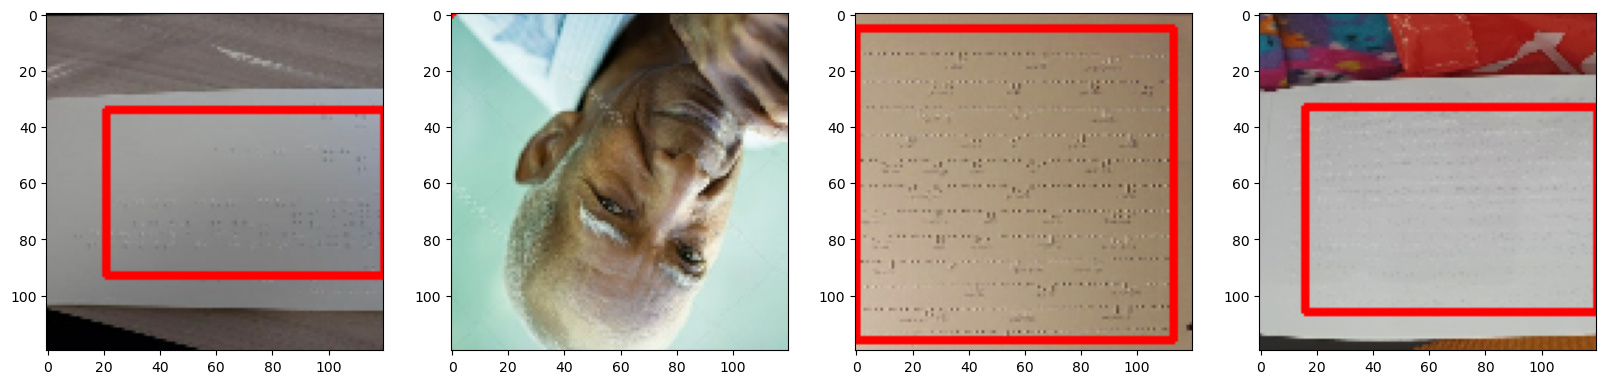

In [290]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [191]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [192]:
vgg = VGG16(include_top=False)

In [193]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## 8.3 Build instance of Network

In [194]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

## 8.4 Test out Neural Network

In [195]:
# .

In [196]:
brailletracker = build_model()

In [197]:
brailletracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [198]:
X, y = train.as_numpy_iterator().next()

In [199]:
X.shape

(8, 120, 120, 3)

In [200]:
classes, coords = brailletracker.predict(X)

1/1 [==============================] - 0s 429ms/step


In [201]:
classes, coords

(array([[0.5886592 ],
        [0.55528814],
        [0.6248308 ],
        [0.6201158 ],
        [0.56997   ],
        [0.5869819 ],
        [0.6352759 ],
        [0.5566915 ]], dtype=float32),
 array([[0.41333404, 0.6550728 , 0.34463173, 0.6149099 ],
        [0.4211328 , 0.65138197, 0.35476062, 0.5615286 ],
        [0.4505858 , 0.5883869 , 0.41991076, 0.53983915],
        [0.48265806, 0.6387029 , 0.40679067, 0.52988935],
        [0.45187393, 0.6027944 , 0.39183578, 0.537097  ],
        [0.43194735, 0.6053256 , 0.39795485, 0.51818377],
        [0.46997175, 0.6292622 , 0.36687958, 0.53190434],
        [0.46228322, 0.62461746, 0.34020904, 0.51666254]], dtype=float32))

## 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [202]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [203]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Create Localization Loss and Classification Loss

In [204]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [205]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [206]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=11.364241>

In [207]:

classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7005067>

In [208]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=11.364241>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [209]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [210]:
model = FaceTracker(brailletracker)

In [211]:

model.compile(opt, classloss, regressloss)

### 10.2 Train

In [212]:
logdir='logs'

In [213]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [214]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
755/755 [==============================] - 632s 783ms/step - total_loss: 0.8736 - class_loss: 0.0870 - regress_loss: 0.8302 - val_total_loss: 0.8529 - val_class_loss: 1.0012 - val_regress_loss: 0.3523
Epoch 2/10
755/755 [==============================] - 632s 792ms/step - total_loss: 0.4380 - class_loss: 0.0276 - regress_loss: 0.4242 - val_total_loss: 0.8931 - val_class_loss: 0.0349 - val_regress_loss: 0.8757
Epoch 3/10
755/755 [==============================] - 631s 788ms/step - total_loss: 0.2710 - class_loss: 0.0111 - regress_loss: 0.2655 - val_total_loss: 0.0852 - val_class_loss: 8.4129e-06 - val_regress_loss: 0.0852
Epoch 4/10
755/755 [==============================] - 633s 792ms/step - total_loss: 0.1667 - class_loss: 0.0071 - regress_loss: 0.1631 - val_total_loss: 0.9672 - val_class_loss: 0.0018 - val_regress_loss: 0.9663
Epoch 5/10
755/755 [==============================] - 626s 778ms/step - total_loss: 0.1199 - class_loss: 0.0043 - regress_loss: 0.1177 - val_total_l

## 10.3 Plot Performance

In [215]:
hist.history

{'total_loss': [0.24838821589946747,
  0.3115845322608948,
  0.14861567318439484,
  0.27885740995407104,
  0.3889625072479248,
  0.1653129607439041,
  0.036384694278240204,
  0.06158710643649101,
  0.05487195774912834,
  0.8187076449394226],
 'class_loss': [0.00379784032702446,
  0.0004292250087019056,
  0.00010886200470849872,
  0.0006978305173106492,
  0.00044318143045529723,
  7.841678598197177e-05,
  5.02382647482591e-07,
  1.1129413906019181e-05,
  3.576281812911475e-07,
  0.000184627206181176],
 'regress_loss': [0.24648930132389069,
  0.311369925737381,
  0.1485612392425537,
  0.2785084843635559,
  0.3887409269809723,
  0.1652737557888031,
  0.03638444468379021,
  0.06158154085278511,
  0.054871778935194016,
  0.8186153173446655],
 'val_total_loss': [0.8528506755828857,
  0.8931418657302856,
  0.08521530777215958,
  0.9672062993049622,
  1.5992207527160645,
  1.9494600296020508,
  0.35253211855888367,
  0.32737231254577637,
  0.3502233028411865,
  0.20711562037467957],
 'val_clas

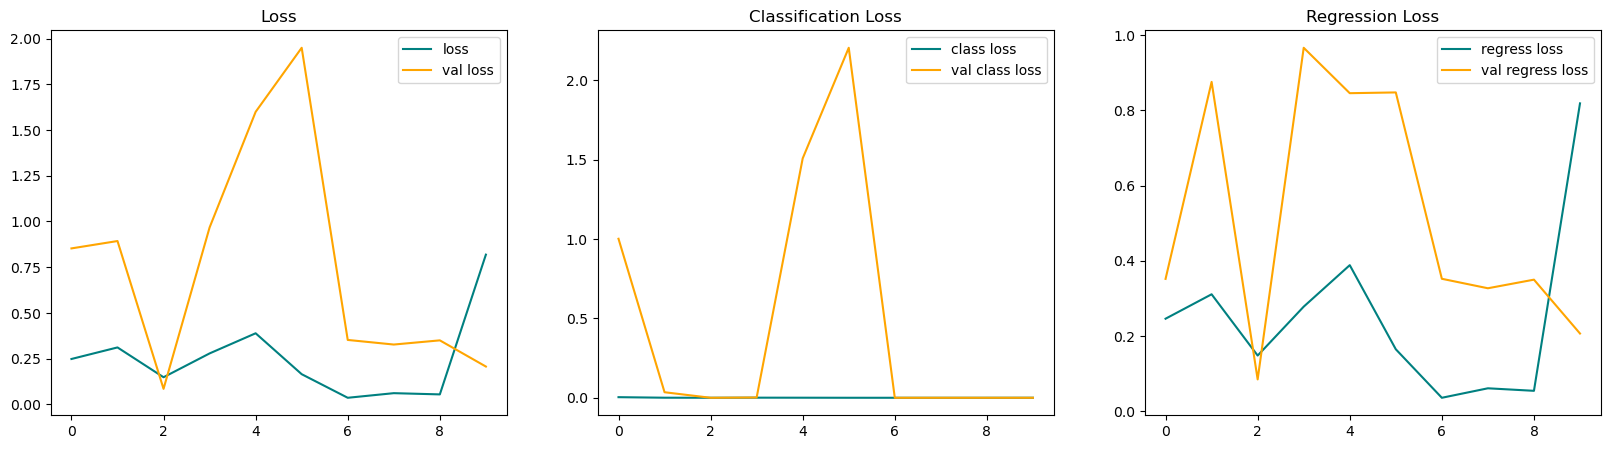

In [216]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

In [283]:

# test_images = tf.data.Dataset.list_files('data\\zz bck\\train\\images\\*.jpg', shuffle=False)
# test_images = test_images.map(load_image)
# test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
# test_images = test_images.map(lambda x: x/255)


# test_labels = tf.data.Dataset.list_files('data\\zz bck\\train\\labels\\*.json', shuffle=False)
# test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))




# test = tf.data.Dataset.zip((test_images, test_labels))
# test = test.shuffle(50)
# test = test.batch(8)
# test = test.prefetch(4)

In [371]:
test_data = test.as_numpy_iterator()

In [372]:
test_sample = test_data.next()

In [373]:
yhat =brailletracker.predict(test_data)

160/160 [==============================] - 36s 226ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


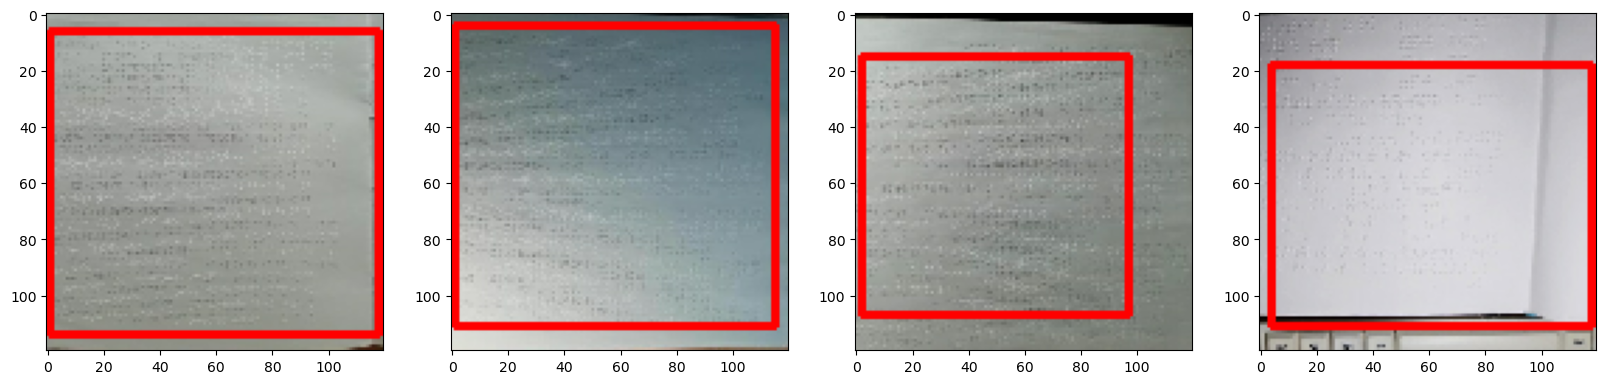

In [374]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [377]:
yhat[0][1]

array([0.9999996], dtype=float32)

# saving model

In [221]:
from tensorflow.keras.models import load_model

In [222]:
brailletracker.save('brailledetect3.h5')

In [223]:
brailletracker = load_model('brailledetect2.h5')

In [224]:
11.3 Real Time Detection

# 11.3 Real Time Detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = brailletracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'Braille dot', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
h

In [294]:
import cv2

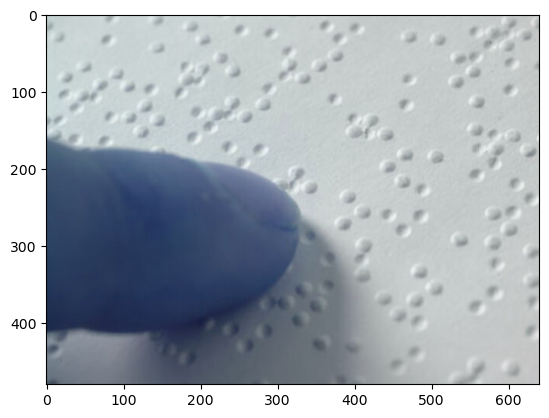

In [429]:
img = cv2.imread('data/zz bck/train/images/Braille_closeup.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 157ms/step
Predicted class is braille
probability value: [[0.9999985]]


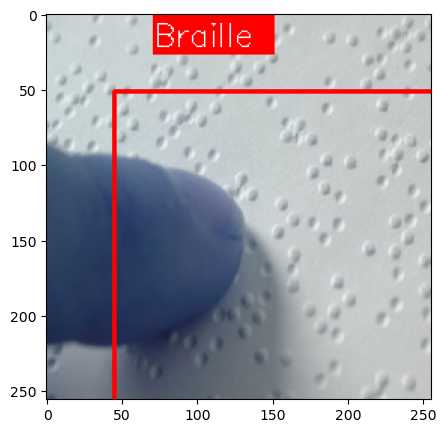

In [438]:
resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()
yhat =brailletracker.predict(np.expand_dims(resize/255, 0))
# print('probability value:', yhat[0])
if yhat[0] < 0.6: 
    print(f'Predicted class is not braille')
else:
    print(f'Predicted class is braille')
    fig, ax = plt.subplots(ncols=1, figsize=(5,5))
    resize1 = resize.numpy().astype(int)
    cv2.rectangle(resize1, 
                        tuple(np.multiply(yhat[1][0][:2], [450,450]).astype(int)),
                        tuple(np.multiply(yhat[1][0][2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
    cv2.rectangle(resize1, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
    cv2.putText(resize1, 'Braille', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, .7, (255,255,255), 1, cv2.LINE_AA)
    ax.imshow(resize1)
print('probability value:', yhat[0])

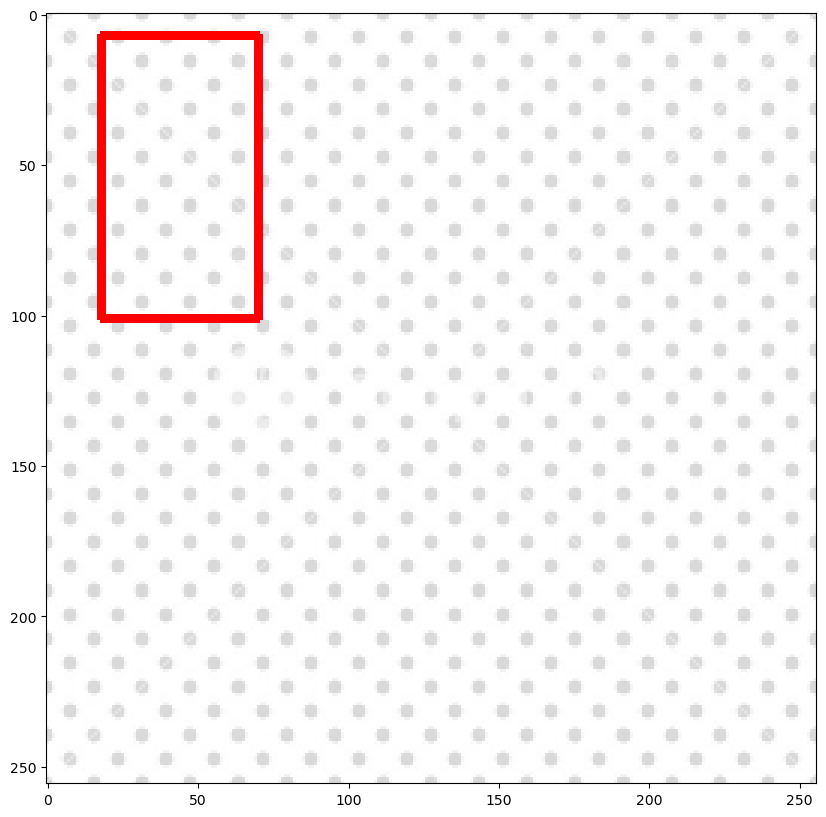

In [407]:
# yhat = model.predict(np.expand_dims(resize/255, 0))
fig, ax = plt.subplots( figsize=(10,10))
resize1 = resize.numpy().astype(int)
cv2.rectangle(resize1, 
                    tuple(np.multiply(yhat[1][0][:2], [120,120]).astype(int)),
                    tuple(np.multiply(yhat[1][0][2:], [120,120]).astype(int)), 
                        (255,0,0), 2)
ax.imshow(resize1)

In [323]:
yhat =brailletracker.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 157ms/step


In [384]:
yhat[1][0]

array([0.1578407 , 0.05881419, 0.5839735 , 0.8428874 ], dtype=float32)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(20,20))
if yhat[0] > -0.9:
        cv2.rectangle(resize, 
                      tuple(np.multiply(yhat[:2], [120,120]).astype(int)),
                      tuple(np.multiply(yhat[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
ax.imshow(resize)

0


IndexError: index 1 is out of bounds for axis 0 with size 1

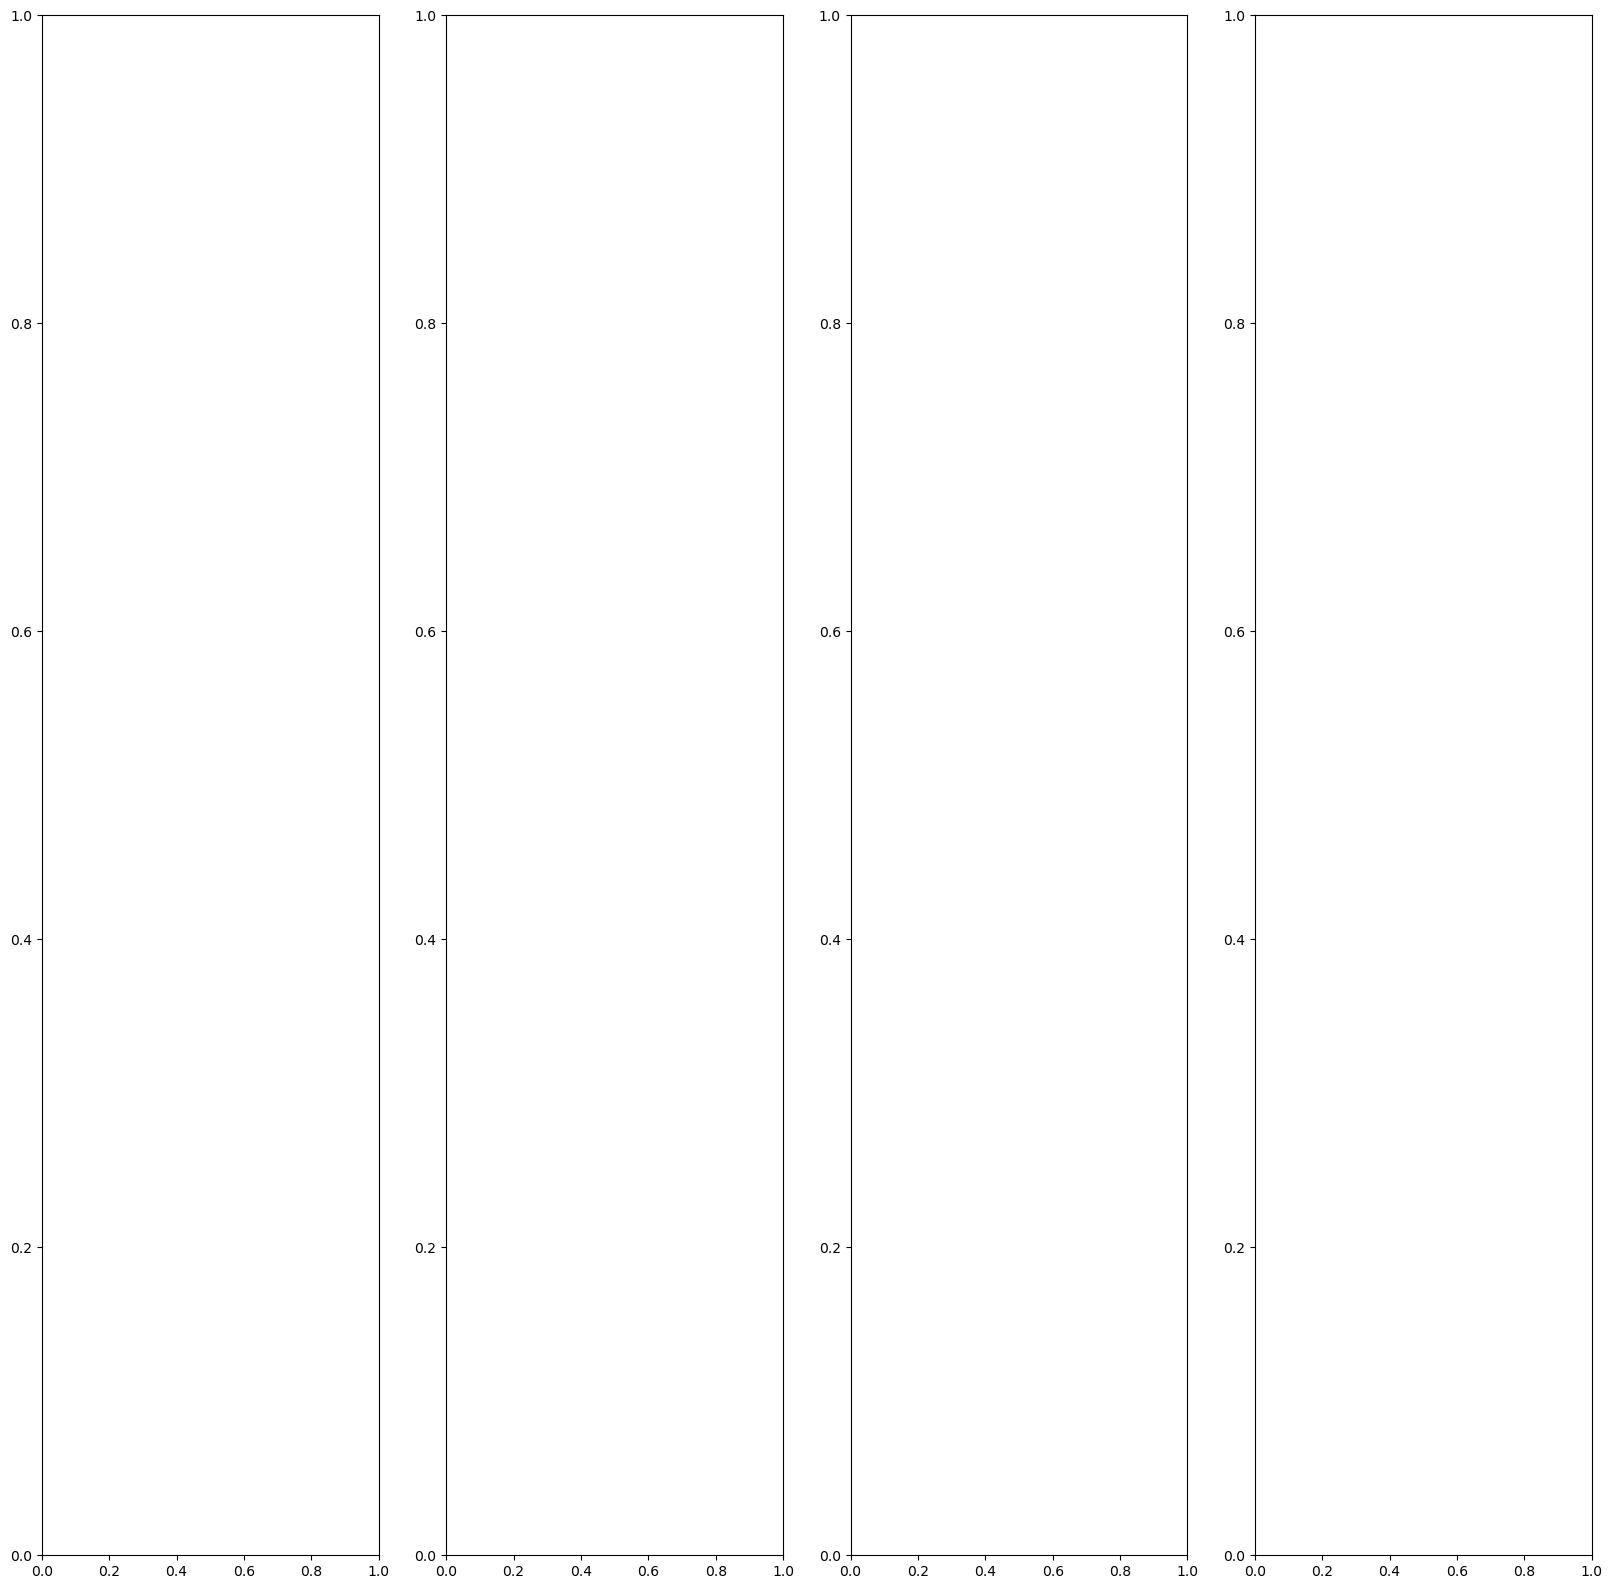

In [389]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    print(idx)
    
    # if yhat[0][idx] > 0.9:
    #     cv2.rectangle(sample_image, 
    #                   tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
    #                   tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
    #                         (255,0,0), 2)
    
    # ax[idx].imshow(sample_image)

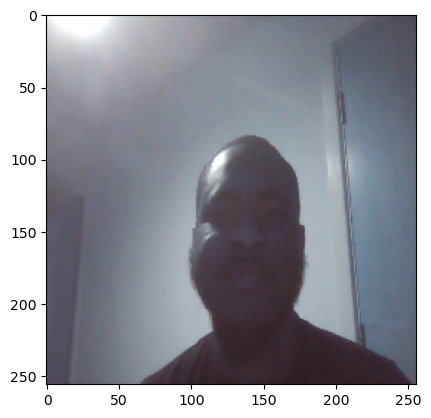

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [305]:



frame = 'data/zz bck/train/images/57aa5739-b923-11ed-9fdc-dde6729d35cd'
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
resized = tf.image.resize(rgb, (120,120))

yhat = brailletracker.predict(np.expand_dims(resized/255,0))
sample_coords = yhat[1][0]

if yhat[0] > 0.5: 
    # Controls the main rectangle
    cv2.rectangle(frame, 
                    tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                    tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                        (255,0,0), 2)
    # Controls the label rectangle
    cv2.rectangle(frame, 
                    tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                [0,-30])),
                    tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                [80,0])), 
                        (255,0,0), -1)
    
    # Controls the text rendered
    cv2.putText(frame, 'Braille dot', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                            [0,-5])),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

# cv2.imshow('EyeTrack', frame)

In [ ]:
for partition in ['test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(33):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['braille'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)
            print(image)